<a href="https://colab.research.google.com/github/aruaru0/pytorch-tests/blob/main/TTA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [145]:
!git clone https://gist.github.com/942d3a0ac09ec9e5eb3a.git

Cloning into '942d3a0ac09ec9e5eb3a'...
remote: Enumerating objects: 6, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (6/6), 13.24 KiB | 2.65 MiB/s, done.


In [1]:
import torch
import timm
from PIL import Image
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("/content/942d3a0ac09ec9e5eb3a/imagenet1000_clsidx_to_labels.txt", "r") as f:
  dat = f.read()

classname = eval(dat)

In [3]:
img = Image.open("cat.jpg")

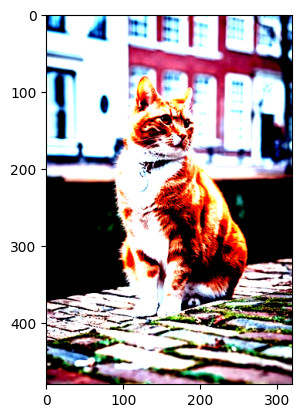

In [4]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

tensor = preprocess(img)
plt.imshow(tensor.permute(1,2,0))

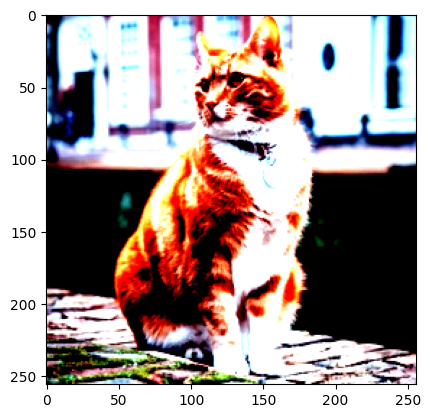

In [5]:
preprocess2 = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.RandomHorizontalFlip(1.0),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

tensor2 = preprocess2(img)
plt.imshow(tensor2.permute(1,2,0))

In [6]:
model = timm.create_model("resnet18", pretrained=True)
model.eval()
print("load model")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


load model


In [7]:
with torch.no_grad():
  pred = model(tensor.unsqueeze(0))
class_id = pred.argmax(axis=1).item()
prob = pred.softmax(axis=1)[0, class_id]
print(f"id:{class_id} name:{classname[class_id]} probability:{prob}")
p = pred.softmax(axis=1)[0]
print(p.topk(k=10))

id:282 name:tiger cat probability:0.23809778690338135
torch.return_types.topk(
values=tensor([0.2381, 0.0985, 0.0605, 0.0203, 0.0099, 0.0092, 0.0058, 0.0053, 0.0052,
        0.0049]),
indices=tensor([282, 285, 281, 287, 284, 292, 750, 356, 904, 543]))


In [8]:
with torch.no_grad():
  pred = model(tensor2.unsqueeze(0))
class_id = pred.argmax(axis=1).item()
prob = pred.softmax(axis=1)[0, class_id]
print(f"id:{class_id} name:{classname[class_id]} probability:{prob}")
p = pred.softmax(axis=1)[0]
print(p.topk(k=10))

id:282 name:tiger cat probability:0.6920549869537354
torch.return_types.topk(
values=tensor([0.6921, 0.1210, 0.0708, 0.0144, 0.0030, 0.0021, 0.0020, 0.0020, 0.0019,
        0.0016]),
indices=tensor([282, 285, 281, 287, 761, 620, 478, 611, 904, 508]))


In [9]:
inputs = [tensor, tensor2]

preds = None
for input in inputs :
  with torch.no_grad():
    pred = model(tensor.unsqueeze(0))
    if preds is None:
      preds = pred
    else:
      preds += pred

class_id = preds.argmax(axis=1).item()
prob = preds.softmax(axis=1)[0, class_id]
print(f"id:{class_id} name:{classname[class_id]} probability:{prob}")
p = pred.softmax(axis=1)[0]
print(p.topk(k=10))

id:282 name:tiger cat probability:0.7927638292312622
torch.return_types.topk(
values=tensor([0.2381, 0.0985, 0.0605, 0.0203, 0.0099, 0.0092, 0.0058, 0.0053, 0.0052,
        0.0049]),
indices=tensor([282, 285, 281, 287, 284, 292, 750, 356, 904, 543]))


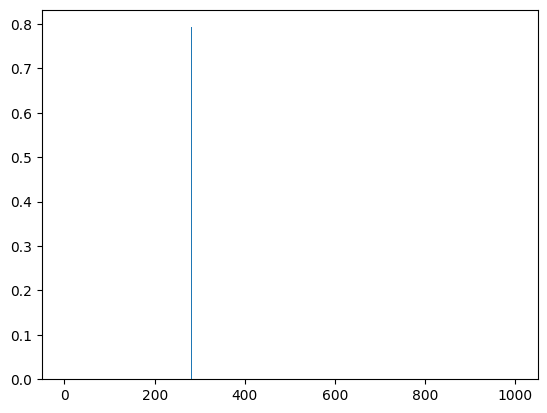

torch.return_types.topk(
values=tensor([7.9276e-01, 1.3561e-01, 5.1170e-02, 5.7594e-03, 1.3788e-03, 1.1897e-03,
        4.7337e-04, 3.9917e-04, 3.7907e-04, 3.3220e-04]),
indices=tensor([282, 285, 281, 287, 284, 292, 750, 356, 904, 543]))


In [10]:
p = preds.softmax(axis=1)[0]
x = [i for i in range(len(p))]
plt.bar(x, p)
plt.show()
print(p.topk(k=10))